In [1093]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [1094]:
img = cv.imread('foreground/fg-1.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [1095]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)


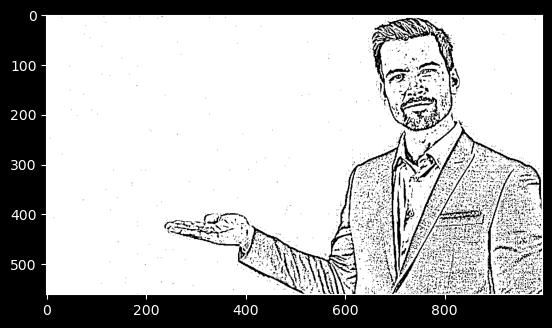

In [1096]:
plt.imshow(binary_mask, cmap='gray')

In [1097]:
binary_mask = cv.bitwise_not(binary_mask)

In [1098]:
cv.fastNlMeansDenoising(binary_mask, binary_mask, 37, 10, 25)

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1099]:
binary_mask = cv.erode(binary_mask, (21,21), iterations=3)
# binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

In [1100]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 3, 7, 5)


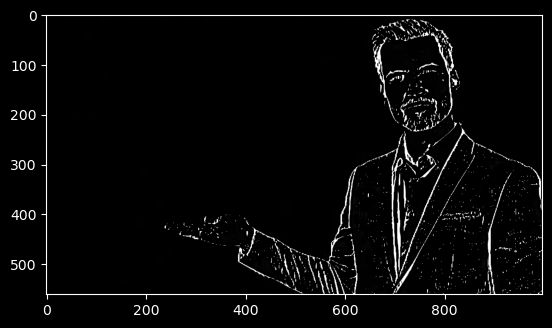

In [1101]:
plt.imshow(binary_mask, cmap='gray')


In [1102]:
binary_mask = cv.bitwise_not(binary_mask)

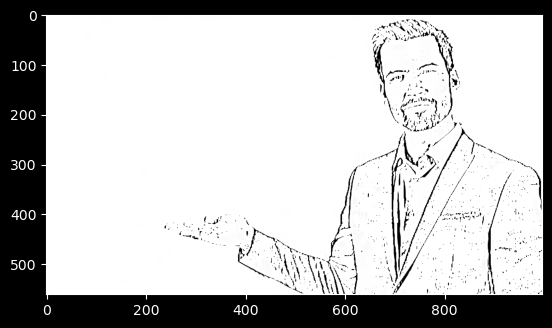

In [1103]:
plt.imshow(binary_mask, cmap='gray')

In [1104]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [1105]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [1106]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [1107]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3]], dtype=uint8),
 array([[3.63057934e-01, 1.91398945e-04, 6.24876173e-01, 1.18744940e-02,
         0.00000000e+00, 1.00235894e+02, 1.85192159e+02, 1.13853763e+02,
         1.08229730e+02, 9.65675676e+01, 8.89594595e+01, 1.12682049e+02,
         2.02835261e+02, 1.24757544e+02, 1.20893923e+02, 1.86839686e+02,
         1.38821607e+02, 2.39582732e+02, 2.21543032e+02, 2.08963215e+02,
         9.38773158e+01, 8.18761058e+01, 5.89097529e+01, 8.18761058e+01,
         7.89506575e+01, 5.58551768e+01, 5.89097529e+01, 5.58551768e+01,
         4.06960076e+01, 7.39337107e+01, 7.49371804e+01, 7.18066107e+01,
         7.49371804e+01, 7.81913806e+01, 7.48473338e+01, 7.18066107e+01,
         7.48473338e+01, 7.28767348e+01, 2.84487099e+01, 1.99130382e+01,
         1.21958770e+01, 1.99130382e+01, 2.1

In [1108]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [1109]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

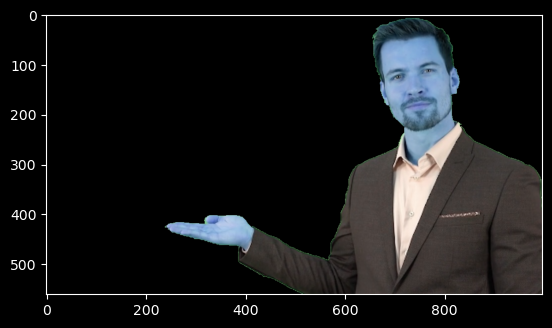

In [1110]:
plt.imshow(segmented_image)

In [1111]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [1112]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

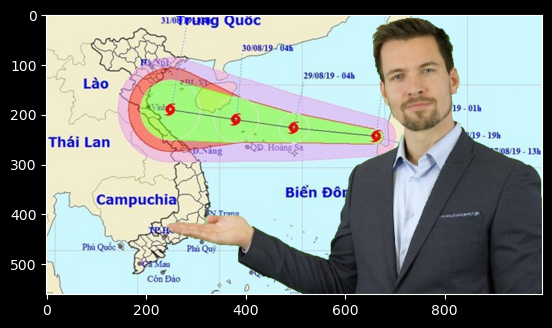

In [1113]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)